In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import stan

try:
    import arviz as az
except ImportError as err:
    print("Please, install arviz for easy visualization of Stan models.")

import nest_asyncio
nest_asyncio.apply()

import pandas as pd

In [47]:
# Read in the datafile first
data = pd.read_csv("sample_response_times.csv", delimiter = ";")

# Read in the model_code
with open("diffusion_model.stan", "r") as program_file:
    model_code = program_file.read()
    print (model_code)

print (data['choice'].astype(float))


data {
    int<lower=1> N;
    array[N] real<lower=0> y;
    array[N] int<lower=1, upper=2> condition;
    array[N] int<lower=0, upper=1> choice;
}

parameters {
    real<lower=0> v1;
    real<lower=0> v2;
    real<lower=0> a;
    real<lower=0> tau;
    real<lower=0, upper=1> b;
}

model {
    // Priors
    v1 ~ gamma(3, 1);
    v2 ~ gamma(3, 1);
    a ~ gamma(3, 1);
    b ~ beta(2, 2);
    tau ~ gamma(2, 1);

    // Likelihood
    for (n in 1:N) {
        // Condition 1
        if (condition[n] == 1) {
            if (choice[n] == 1) {
                 y[n] ~ wiener(a, tau, b, v1);
            }
            else {
                 y[n] ~ wiener(a, tau, 1-b, -v1);
            }
        }
        // Condition 2
        if (condition[n] == 2) {
            if (choice[n] == 1) {
                 y[n] ~ wiener(a, tau, b, v2);
            }
            else {
                 y[n] ~ wiener(a, tau, 1-b, -v2);
            }
        }
    }
}
0      1.0
1      1.0
2      0.0
3      1.0
4      

In [48]:
data_dict = {
    "N" : 300,
    "y" : list(data['rt'].astype(float)),
    "condition" : list(data['condition'].astype(int)),
    "choice" : list(data['choice'].astype(int))
}
data_dict

model = stan.build(model_code, data = data_dict)

Building...



Building: found in cache, done.

In [49]:
fit = model.sample(num_chains=4, num_samples = 500, num_warmup = 1000)

Sampling:   0%
Sampling:   0% (1/6000)
Sampling:   0% (2/6000)
Sampling:   0% (3/6000)
Sampling:   0% (4/6000)
Sampling:   2% (103/6000)
Sampling:   3% (202/6000)
Sampling:   5% (301/6000)
Sampling:   7% (401/6000)
Sampling:   8% (501/6000)
Sampling:  10% (601/6000)
Sampling:  12% (701/6000)
Sampling:  13% (801/6000)
Sampling:  15% (901/6000)
Sampling:  17% (1000/6000)
Sampling:  18% (1100/6000)
Sampling:  20% (1200/6000)
Sampling:  22% (1300/6000)
Sampling:  23% (1400/6000)
Sampling:  25% (1500/6000)
Sampling:  27% (1600/6000)
Sampling:  28% (1700/6000)
Sampling:  30% (1800/6000)
Sampling:  32% (1900/6000)
Sampling:  33% (2000/6000)
Sampling:  35% (2100/6000)
Sampling:  37% (2200/6000)
Sampling:  38% (2300/6000)
Sampling:  40% (2400/6000)
Sampling:  42% (2500/6000)
Sampling:  43% (2600/6000)
Sampling:  45% (2700/6000)
Sampling:  47% (2800/6000)
Sampling:  48% (2900/6000)
Sampling:  50% (3001/6000)
Sampling:  52% (3101/6000)
Sampling:  53% (3201/6000)
Sampling:  55% (3301/6000)
Samplin

<Axes: ylabel='Count'>

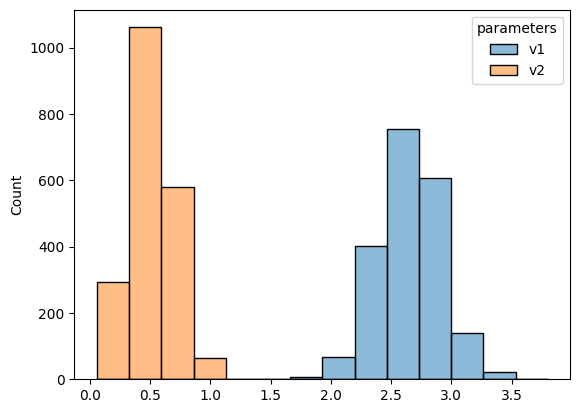

In [50]:
results_df = fit.to_frame()

sns.histplot(results_df[["v1", "v2"]])

In [51]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v1,2.654,0.260,2.198,3.183,0.007,0.006,1471.0,1302.0,1.01
v2,0.513,0.178,0.193,0.858,0.005,0.004,1325.0,707.0,1.00
a,0.852,0.026,0.803,0.902,0.001,0.001,1445.0,1575.0,1.01
tau,0.396,0.003,0.391,0.402,0.000,0.000,1293.0,1392.0,1.00
b,0.511,0.021,0.475,0.552,0.001,0.000,1367.0,1342.0,1.00
